# **PIA: Entrenamiento de una red neuronal convolucional**

In [ ]:
"""
 Integrantes del Equipo:
 (Lider)Nombre:Odalis Areili Elizondo Márquez Matricula:1925879
 Nombre:Naydellin Ivonne Soto Villegas        Matricula:1966800
 Nombre:Arturo Azael Niño Lopez               Matricula:1973434
 Nombre:Diego Alexander Hernández Domínguez   Matricula:1900987
 Nombre:Victor Abraham Vazquez Alvarez        Matricula:1925879
 Hora Clase:N1 GPO: 007
 Título: PIA_Entrenamiento de una red neuronal convolucional
"""

**1. Cargar Librerias**

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models, Sequential
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**2. Cargar Datos**

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/IA/casting_data/train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(400,400))

Found 2856 files belonging to 87 classes.
Using 2285 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/IA/casting_data/train',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(400,400))

Found 2856 files belonging to 87 classes.
Using 571 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['Alexandrite', 'Almandine', 'Amazonite', 'Amber', 'Amethyst', 'Ametrine', 'Andalusite', 'Andradite', 'Aquamarine', 'Aventurine Green', 'Aventurine Yellow', 'Benitoite', 'Beryl Golden', 'Bixbite', 'Bloodstone', 'Blue Lace Agate', 'Carnelian', 'Cats Eye', 'Chalcedony', 'Chalcedony Blue', 'Chrome Diopside', 'Chrysoberyl', 'Chrysocolla', 'Chrysoprase', 'Citrine', 'Coral', 'Danburite', 'Diamond', 'Diaspore', 'Dumortierite', 'Emerald', 'Fluorite', 'Garnet Red', 'Goshenite', 'Grossular', 'Hessonite', 'Hiddenite', 'Iolite', 'Jade', 'Jasper', 'Kunzite', 'Kyanite', 'Labradorite', 'Lapis Lazuli', 'Larimar', 'Malachite', 'Moonstone', 'Morganite', 'Onyx Black', 'Onyx Green', 'Onyx Red', 'Opal', 'Pearl', 'Peridot', 'Prehnite', 'Pyrite', 'Pyrope', 'Quartz Beer', 'Quartz Lemon', 'Quartz Rose', 'Quartz Rutilated', 'Quartz Smoky', 'Rhodochrosite', 'Rhodolite', 'Rhodonite', 'Ruby', 'Sapphire Blue', 'Sapphire Pink', 'Sapphire Purple', 'Sapphire Yellow', 'Scapolite', 'Serpentine', 'Sodalite', 'Spessartite

**3. Preprocesamiento aplicado a las imagenes**

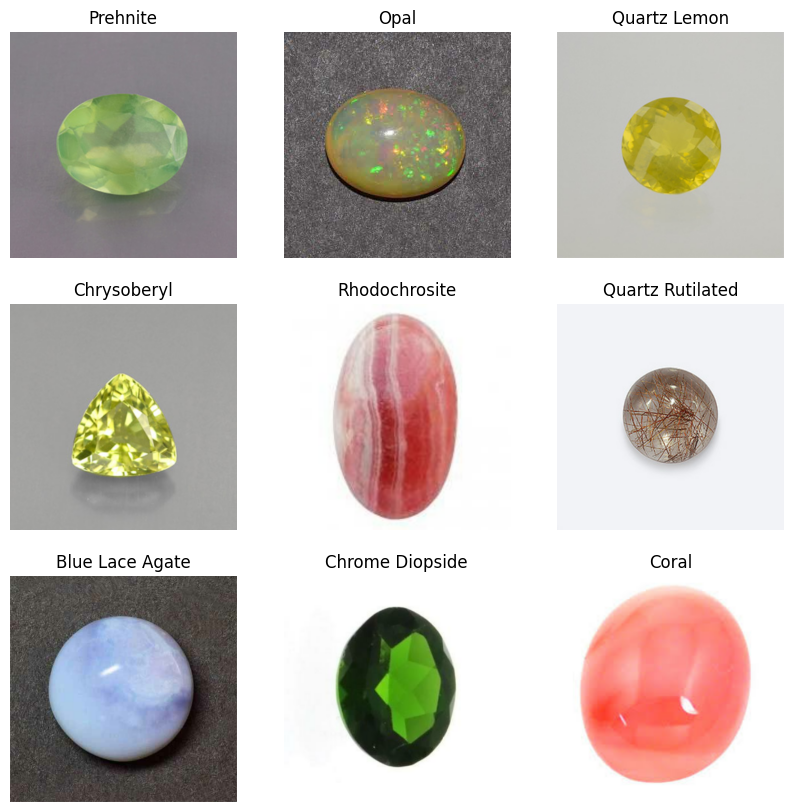

In [7]:
import matplotlib.pyplot as plt # Importar la libreria de matplolib para graficar

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [43]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 400, 400, 3)
(32,)


**4. Selección, Entrenamiento del Modelo y Prueba del Modelo**



#Predicción 1

In [15]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(400, 400, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 400, 400, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 400, 400, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 200, 200, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 100, 100, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 64)      1

In [47]:
epochs= 4
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/4
72/72 [==============================] - 478s 7s/step - loss: 4.6426 - accuracy: 0.0521 - val_loss: 3.6950 - val_accuracy: 0.1051
Epoch 2/4
72/72 [==============================] - 482s 7s/step - loss: 2.9926 - accuracy: 0.2416 - val_loss: 2.8226 - val_accuracy: 0.2644
Epoch 3/4
72/72 [==============================] - 459s 6s/step - loss: 1.8754 - accuracy: 0.4783 - val_loss: 2.4715 - val_accuracy: 0.3450
Epoch 4/4
72/72 [==============================] - 461s 6s/step - loss: 1.1745 - accuracy: 0.6748 - val_loss: 2.4473 - val_accuracy: 0.3818


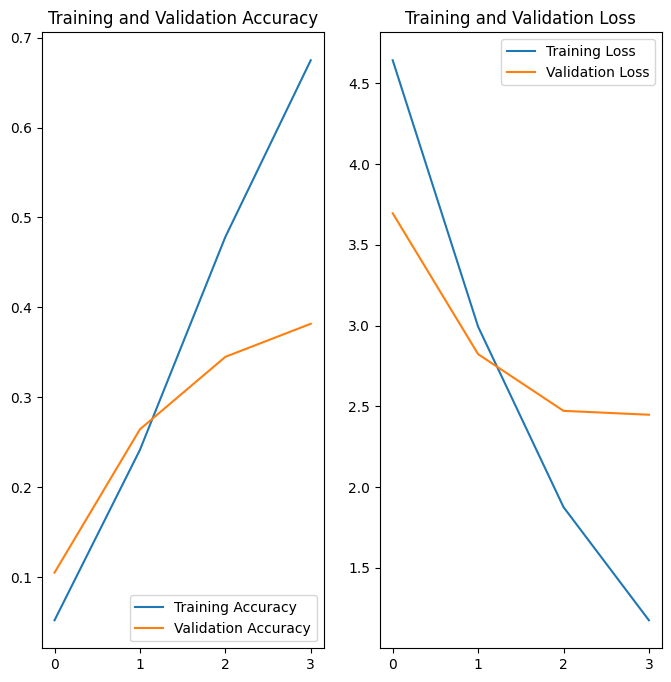

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
image_path = '/content/drive/MyDrive/IA/casting_data/test/Blue Lace Agate/blue lace agate_41.jpg'
image = tf.keras.preprocessing.image.load_img(image_path)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

1/1 [==============================] - 0s 293ms/step


In [50]:
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Esta imagen parece ser Chalcedony Blue con un 69.54 % de exactitud.


In [51]:
model.save('/content/drive/MyDrive/IA/tmp/model')

In [9]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/IA/tmp/model')

#Predicción 2

In [19]:
image_path = '/content/drive/MyDrive/IA/casting_data/test/Jade/jade_8.jpg'
image = tf.keras.preprocessing.image.load_img(image_path)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 74ms/step
Esta imagen parece ser Sapphire Purple con un 1.58 % de exactitud.


In [20]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(400, 400, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 400, 400, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 400, 400, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 200, 200, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 200, 200, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 100, 100, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 100, 100, 64)     

In [57]:
epochs=4
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/4
72/72 [==============================] - 444s 6s/step - loss: 4.7259 - accuracy: 0.0420 - val_loss: 3.7789 - val_accuracy: 0.1173
Epoch 2/4
72/72 [==============================] - 437s 6s/step - loss: 3.1038 - accuracy: 0.2114 - val_loss: 2.8946 - val_accuracy: 0.2469
Epoch 3/4
72/72 [==============================] - 428s 6s/step - loss: 2.1169 - accuracy: 0.4026 - val_loss: 2.3474 - val_accuracy: 0.3503
Epoch 4/4
72/72 [==============================] - 424s 6s/step - loss: 1.4138 - accuracy: 0.5921 - val_loss: 2.3317 - val_accuracy: 0.3905


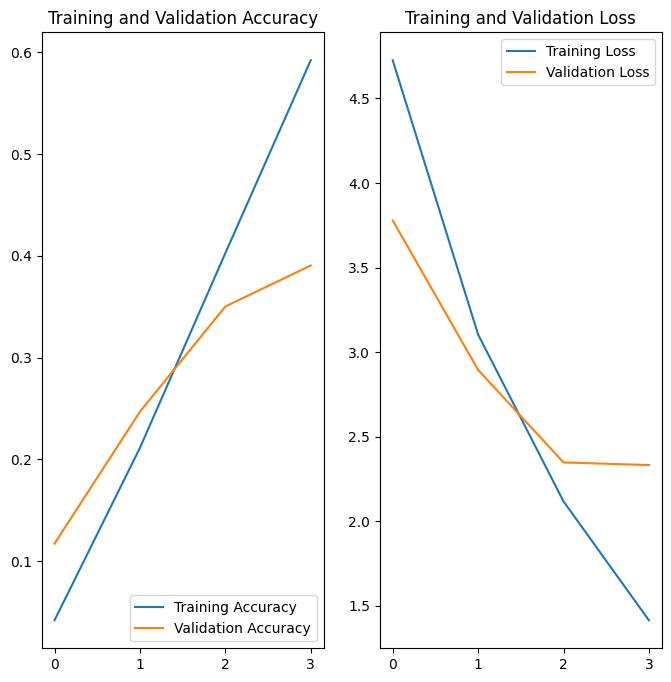

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [59]:
model.save('/content/drive/MyDrive/IA/tmp/model_dropout')

#Predicción 3

In [24]:
image_path = '/content/drive/MyDrive/IA/casting_data/test/Serpentine/serpentine_2.jpg'
image = tf.keras.preprocessing.image.load_img(image_path)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 335ms/step
Esta imagen parece ser Beryl Golden con un 1.36 % de exactitud.


In [25]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(400, 400, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 400, 400, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 400, 400, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 200, 200, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 200, 200, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 100, 100, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 100, 100, 64)     

In [36]:
epochs=2
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/2
72/72 [==============================] - 529s 7s/step - loss: 4.5849 - accuracy: 0.0503 - val_loss: 3.7739 - val_accuracy: 0.0998
Epoch 2/2
72/72 [==============================] - 468s 6s/step - loss: 3.1093 - accuracy: 0.2131 - val_loss: 2.8070 - val_accuracy: 0.2785


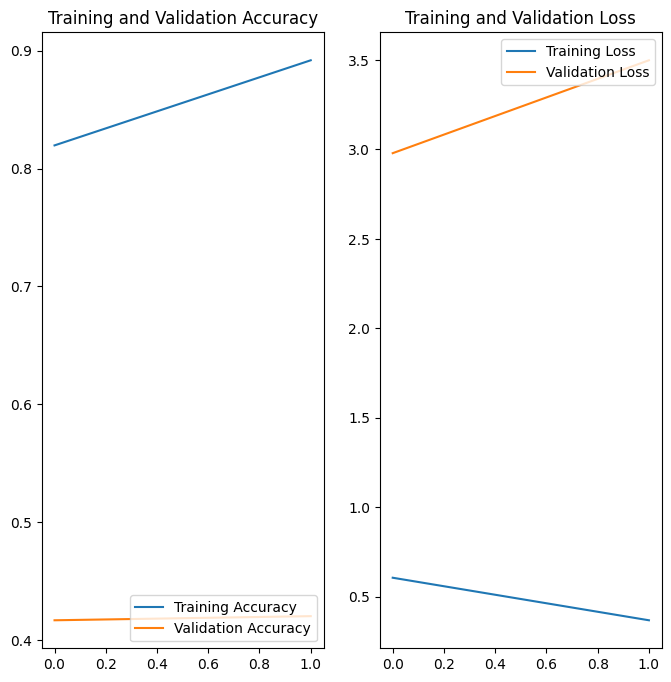

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Predicción 4

In [28]:
image_path = '/content/drive/MyDrive/IA/casting_data/test/Sapphire Blue/sapphire blue_3.jpg'
image = tf.keras.preprocessing.image.load_img(image_path)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 145ms/step
Esta imagen parece ser Hessonite con un 1.46 % de exactitud.


In [29]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(400, 400, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 400, 400, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 400, 400, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 200, 200, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 200, 200, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 100, 100, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 100, 100, 64)     

In [37]:
epochs=2
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/2
72/72 [==============================] - 454s 6s/step - loss: 1.9173 - accuracy: 0.4565 - val_loss: 2.2552 - val_accuracy: 0.3730
Epoch 2/2
72/72 [==============================] - 460s 6s/step - loss: 1.0955 - accuracy: 0.6722 - val_loss: 2.3643 - val_accuracy: 0.4221


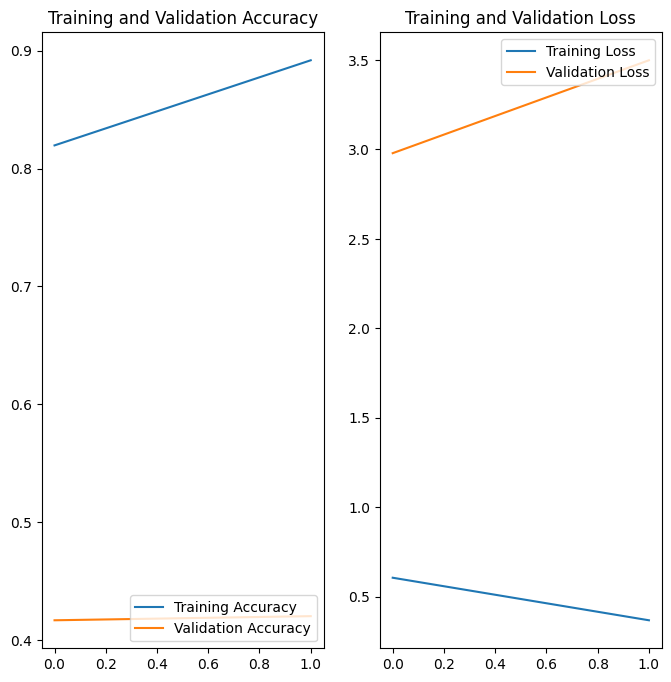

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Predicción 5

In [32]:
image_path = '/content/drive/MyDrive/IA/casting_data/test/Topaz/topaz_6.jpg'
image = tf.keras.preprocessing.image.load_img(image_path)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 132ms/step
Esta imagen parece ser Garnet Red con un 1.55 % de exactitud.


In [33]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(400, 400, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 400, 400, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 400, 400, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 200, 200, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 200, 200, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 100, 100, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 100, 100, 64)     

In [38]:
epochs=2
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/2
72/72 [==============================] - 454s 6s/step - loss: 0.6066 - accuracy: 0.8197 - val_loss: 2.9794 - val_accuracy: 0.4168
Epoch 2/2
72/72 [==============================] - 447s 6s/step - loss: 0.3688 - accuracy: 0.8919 - val_loss: 3.4986 - val_accuracy: 0.4203


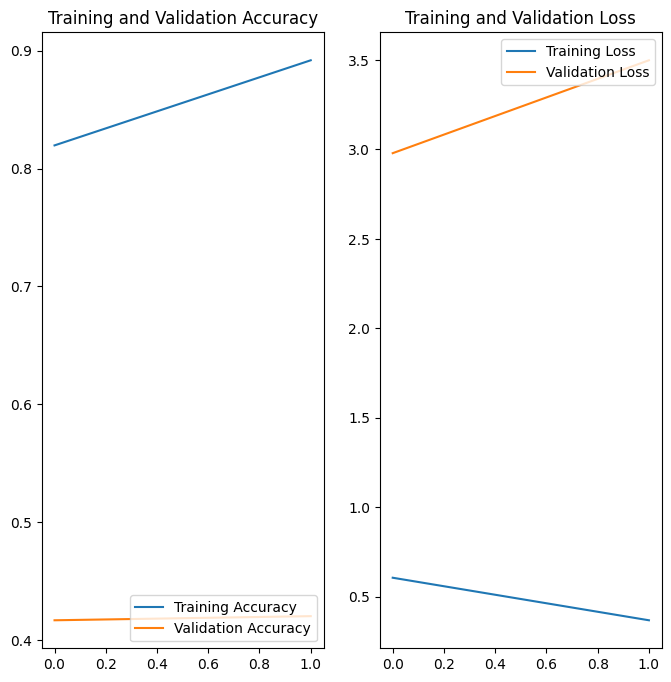

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()